In [13]:
import argparse
import numpy as np

from svm import weight_vector, find_support, find_slack
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class FoursAndNines:
    """
    Class to store MNIST data
    """

    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if
        # you'd like.

        import pickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        train_set, valid_set, test_set = pickle.load(f)

        self.x_train = train_set[0][np.where(np.logical_or( train_set[1]==4, train_set[1] == 9))[0],:]
        self.y_train = train_set[1][np.where(np.logical_or( train_set[1]==4, train_set[1] == 9))[0]]

        shuff = np.arange(self.x_train.shape[0])
        np.random.shuffle(shuff)
        self.x_train = self.x_train[shuff,:]
        self.y_train = self.y_train[shuff]

        self.x_valid = valid_set[0][np.where(np.logical_or( valid_set[1]==4, valid_set[1] == 9))[0],:]
        self.y_valid = valid_set[1][np.where(np.logical_or( valid_set[1]==4, valid_set[1] == 9))[0]]

        self.x_test  = test_set[0][np.where(np.logical_or( test_set[1]==4, test_set[1] == 9))[0],:]
        self.y_test  = test_set[1][np.where(np.logical_or( test_set[1]==4, test_set[1] == 9))[0]]

        f.close()

In [3]:

def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1,28))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

In [4]:
#parser = argparse.ArgumentParser(description='SVM classifier options')
#parser.add_argument('--limit', type=int, default=-1,
#                    help="Restrict training to this many examples")
#args = parser.parse_args()


data = FoursAndNines("../data/mnist.pkl.gz")




In [6]:

clf = SVC(kernel='poly', degree=2)

In [8]:
score = 'accuracy'

clf.fit(data.x_train, data.y_train)

y_true, y_pred = data.y_test, clf.predict(data.x_test)
print ("Scoring = ",score)
print(classification_report(y_true, y_pred))




Scoring =  accuracy
             precision    recall  f1-score   support

          4       0.95      0.95      0.95       982
          9       0.95      0.96      0.95      1009

avg / total       0.95      0.95      0.95      1991



In [9]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
clf.n_support_


array([3250, 3246], dtype=int32)

In [34]:
print (clf.support_.shape)
print (clf.support_)
print (clf.n_support_)
print (clf.support_vectors_)
print (clf.support_vectors_.shape)

(6496,)
[   3    7    8 ..., 9843 9845 9846]
[3250 3246]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(6496, 784)


In [37]:
print (clf.dual_coef_)
print (clf.dual_coef_.shape)

[[-1. -1. -1. ...,  1.  1.  1.]]
(1, 6496)


In [38]:
print (len(data.x_train))

9847


Example of -1 SV, idx =  0


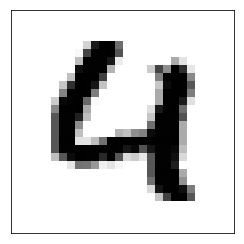

Example of -1 SV, idx =  1


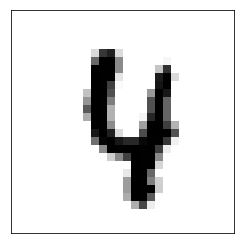

Example of -1 SV, idx =  2


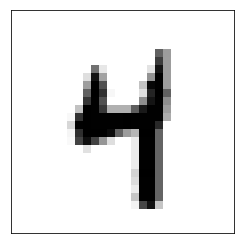

Example of -1 SV, idx =  3


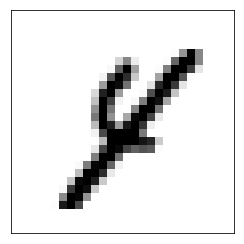

Example of -1 SV, idx =  4


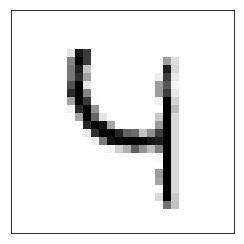

Example of +1 SV, idx =  3250


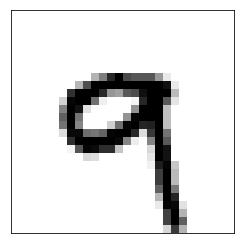

Example of +1 SV, idx =  3251


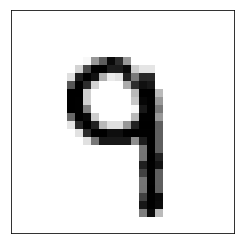

Example of +1 SV, idx =  3252


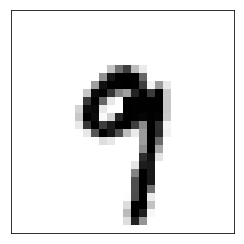

Example of +1 SV, idx =  3253


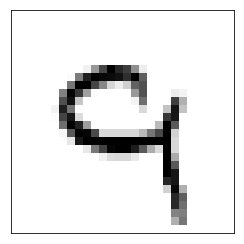

Example of +1 SV, idx =  3254


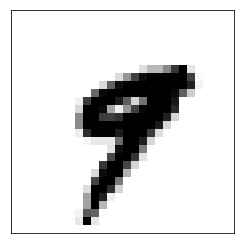

In [68]:
found_minus = 0
found_plus = 0
count = 5
for idx, sv_index in enumerate(clf.dual_coef_[0]):
    #print (idx, sv_index, clf.support_[idx])
    if found_minus > count and found_plus > count:
        break
    if found_minus < count:
        if int(sv_index) == -1:
            found_minus += 1
            if found_minus < count + 1:
                #print (idx, list(clf.support_)[idx])
                print("Example of -1 SV, idx = ", idx)
                mnist_digit_show(data.x_train[clf.support_[idx]])
                continue
    if found_plus < count :
        if int(sv_index) == 1:
            found_plus += 1
            if found_plus < count + 1:
                #print (idx, list(clf.support_)[idx])
                print("Example of +1 SV, idx = ", idx)
                mnist_digit_show(data.x_train[clf.support_[idx]])
                continue
